# cleaning data until 12/15

In [31]:
import pandas as pd
#read csv /Users/jasperhewitt/Desktop/github_repos/Campaigning_101/data/campaign_to_12_15.csv
df=pd.read_csv('/Users/jasperhewitt/Desktop/github_repos/Campaigning_101/data/original_crowdtangle_to_12_15.csv')

In [32]:
df = df.sort_values(by='Post Created')

In [33]:
#take out the dates before the other candidates were announced
len(df)

1591

In [34]:
import pandas as pd

# Assuming df is your DataFrame

# Convert the "Post Created Date" column to datetime format
df['Post Created Date'] = pd.to_datetime(df['Post Created Date'])

# Define the target dates for each candidate
hou_dates = pd.to_datetime('2023-05-17')
ke_dates = pd.to_datetime('2023-05-16')
guo_start_date = pd.to_datetime('2023-08-28')
guo_end_date = pd.to_datetime('2023-11-24')

# Filter for 侯友宜: 2023-05-17 and later
df_hou = df[(df['Page Name'] == '侯友宜') & (df['Post Created Date'] >= hou_dates)]

# Filter for 柯文哲: 2023-05-16 and later
df_ke = df[(df['Page Name'] == '柯文哲') & (df['Post Created Date'] >= ke_dates)]

# Filter for 郭台銘: 2023-08-28 to 2023-11-24
df_guo = df[(df['Page Name'] == '郭台銘') & (df['Post Created Date'] >= guo_start_date) & (df['Post Created Date'] <= guo_end_date)]

# Keep all posts for 賴清德 without date filtering
df_lai = df[df['Page Name'] == '賴清德']

# Concatenate the results
filtered_df = pd.concat([df_hou, df_ke, df_guo, df_lai])

# Display the filtered DataFrame
print(filtered_df)

     Page Name User Name      Facebook Id Page Category   
152        侯友宜   houyuih  100044642490075    POLITICIAN  \
727        侯友宜   houyuih  100044642490075    POLITICIAN   
1163       侯友宜   houyuih  100044642490075    POLITICIAN   
483        侯友宜   houyuih  100044642490075    POLITICIAN   
445        侯友宜   houyuih  100044642490075    POLITICIAN   
...        ...       ...              ...           ...   
18         賴清德   chingte  100044573580122    POLITICIAN   
303        賴清德   chingte  100044573580122    POLITICIAN   
939        賴清德   chingte  100044573580122    POLITICIAN   
836        賴清德   chingte  100044573580122    POLITICIAN   
1523       賴清德   chingte  100044573580122    POLITICIAN   

     Page Admin Top Country       Page Description         Page Created   
152                      TW             顧好台灣，人民好康！  2016-05-26 07:40:26  \
727                      TW             顧好台灣，人民好康！  2016-05-26 07:40:26   
1163                     TW             顧好台灣，人民好康！  2016-05-26 07:

In [35]:
filtered_df = filtered_df.sort_values(by='Post Created')

In [36]:
filtered_df.insert(0, 'serial_number', range(1, 1 + len(filtered_df)))

## merge columns and separate metadata from relevant columns

In [37]:
filtered_df.columns

Index(['serial_number', 'Page Name', 'User Name', 'Facebook Id',
       'Page Category', 'Page Admin Top Country', 'Page Description',
       'Page Created', 'Likes at Posting', 'Followers at Posting',
       'Post Created', 'Post Created Date', 'Post Created Time', 'Type',
       'Total Interactions', 'Likes', 'Comments', 'Shares', 'Love', 'Wow',
       'Haha', 'Sad', 'Angry', 'Care', 'Video Share Status', 'Is Video Owner?',
       'Post Views', 'Total Views', 'Total Views For All Crossposts',
       'Video Length', 'URL', 'Message', 'Link', 'Final Link', 'Image Text',
       'Link Text', 'Description', 'Sponsor Id', 'Sponsor Name',
       'Sponsor Category',
       'Total Interactions (weighted  —  Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x )',
       'Overperforming Score'],
      dtype='object')

In [38]:
#create a new column that combines the contents of Message, Image Text, and Description
#delete the 'index' column
filtered_df['combined_text'] = filtered_df['Message'].fillna('') + filtered_df['Image Text'].fillna('') + filtered_df['Description'].fillna('')

In [39]:
#ok now seperate the data into 2 different dataframes.
#the first df only contains the columns serial_number, User Name, URL, Post Created, combined_text
labelling_df = filtered_df[['serial_number', 'User Name', 'URL', 'Post Created', 'combined_text']]

# keyword search for relevant rows

In [40]:
#check values in Page Name User Name of labelling_df
labelling_df['User Name'].value_counts()


User Name
chingte         577
houyuih         342
DoctorKoWJ      292
TerryGou1018    161
Name: count, dtype: int64

In [41]:
#create a new column called 'mention_other' that is empty
labelling_df['mention_other'] = ''
#and another one called 'mentioned_other' that is empty
labelling_df['mentioned_other'] = ''
#and another one called 'attack' that is empty
labelling_df['attack'] = ''
#and another one called 'target' that is empty
labelling_df['target'] = ''
#add another one called 'description' that is empty
labelling_df['description'] = ''

/var/folders/kf/vzjyh1g17x3gw7hgly31fnc80000gn/T/ipykernel_30111/4173323438.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labelling_df['mention_other'] = ''
/var/folders/kf/vzjyh1g17x3gw7hgly31fnc80000gn/T/ipykernel_30111/4173323438.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labelling_df['mentioned_other'] = ''
/var/folders/kf/vzjyh1g17x3gw7hgly31fnc80000gn/T/ipykernel_30111/4173323438.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [42]:
#split labelling df in 4 different dfs based on User Name
ke_df = labelling_df[labelling_df['User Name'] == 'DoctorKoWJ']
lai_df = labelling_df[labelling_df['User Name'] == 'chingte']
hou_df = labelling_df[labelling_df['User Name'] == 'houyuih']
terry_df= labelling_df[labelling_df['User Name'] == 'TerryGou1018']


In [55]:
#賴清德
# List of terms to check for in the 'combined_text' column
terms_to_check = ["侯", "國民黨", "民眾黨", "柯", "郭", "藍白", "吳", 
                  "馬前總統", "馬英九", "朱", "趙", "賴佩霞", "在野黨", 
                  "藍營", "主流民意大聯盟"] 

# Function to check for all terms present in the 'combined_text' column
def check_terms(text):
    hits = []
    for term in terms_to_check:
        if term in text:
            hits.append(term)
    return hits

# Apply the function to create the 'mentioned_other' column for the entire DataFrame
lai_df['mentioned_other'] = lai_df['combined_text'].apply(check_terms)
# Convert the list of hits to a comma-separated string
lai_df['mentioned_other'] = lai_df['mentioned_other'].apply(lambda x: ', '.join(x) if x else 'no')

# Fill the mention_other column with 'yes' if the mentioned_other column contains any value other than 'no'.
lai_df['mention_other'] = lai_df['mentioned_other'].apply(lambda x: 'yes' if x != 'no' else 'no') 

#count number of 'yes' in mention_other column
lai_df['mention_other'].value_counts()


/var/folders/kf/vzjyh1g17x3gw7hgly31fnc80000gn/T/ipykernel_30111/2156557188.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lai_df['mentioned_other'] = lai_df['combined_text'].apply(check_terms)
/var/folders/kf/vzjyh1g17x3gw7hgly31fnc80000gn/T/ipykernel_30111/2156557188.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lai_df['mentioned_other'] = lai_df['mentioned_other'].apply(lambda x: ', '.join(x) if x else 'no')
/var/folders/kf/vzjyh1g17x3gw7hgly31fnc80000gn/T/ipykernel_30111/2156557188.py:24: S

mention_other
no     513
yes     64
Name: count, dtype: int64

In [59]:
#柯文哲
# List of terms to check for in the 'combined_text' column
terms_to_check = ["民進黨", "民主進步黨", "賴", "侯", "國民黨", 
                  "郭", "藍白", "蕭", "蔡", "馬前總統", "馬英九", 
                  "朱", "趙", "賴佩霞", "藍綠", "執政黨", "藍營", "綠營", 
                  "主流民意大聯盟"] 

# Function to check for all terms present in the 'combined_text' column
def check_terms(text):
    hits = []
    for term in terms_to_check:
        if term in text:
            hits.append(term)
    return hits

# Apply the function to create the 'mentioned_other' column for the entire DataFrame
ke_df['mentioned_other'] = ke_df['combined_text'].apply(check_terms)
# Convert the list of hits to a comma-separated string
ke_df['mentioned_other'] = ke_df['mentioned_other'].apply(lambda x: ', '.join(x) if x else 'no')

# Fill the mention_other column with 'yes' if the mentioned_other column contains any value other than 'no'.
ke_df['mention_other'] = ke_df['mentioned_other'].apply(lambda x: 'yes' if x != 'no' else 'no') 

#count number of 'yes' in mention_other column
ke_df['mention_other'].value_counts()

/var/folders/kf/vzjyh1g17x3gw7hgly31fnc80000gn/T/ipykernel_30111/2201140941.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ke_df['mentioned_other'] = ke_df['combined_text'].apply(check_terms)
/var/folders/kf/vzjyh1g17x3gw7hgly31fnc80000gn/T/ipykernel_30111/2201140941.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ke_df['mentioned_other'] = ke_df['mentioned_other'].apply(lambda x: ', '.join(x) if x else 'no')
/var/folders/kf/vzjyh1g17x3gw7hgly31fnc80000gn/T/ipykernel_30111/2201140941.py:25: Setti

mention_other
no     180
yes    112
Name: count, dtype: int64

In [60]:
#侯友宜

# List of terms to check for in the 'combined_text' column
terms_to_check = ["民進黨", "民主進步黨", "民眾黨", "柯", "郭", "賴", "藍白", 
                  "蕭", "蔡", "賴佩霞", "執政黨", "主流民意大聯盟", "吳", "綠營"] 

# Function to check for all terms present in the 'combined_text' column
def check_terms(text):
    hits = []
    for term in terms_to_check:
        if term in text:
            hits.append(term)
    return hits

# Apply the function to create the 'mentioned_other' column for the entire DataFrame
hou_df['mentioned_other'] = hou_df['combined_text'].apply(check_terms)
# Convert the list of hits to a comma-separated string
hou_df['mentioned_other'] = hou_df['mentioned_other'].apply(lambda x: ', '.join(x) if x else 'no')

# Fill the mention_other column with 'yes' if the mentioned_other column contains any value other than 'no'.
hou_df['mention_other'] = hou_df['mentioned_other'].apply(lambda x: 'yes' if x != 'no' else 'no') 

#count number of 'yes' in mention_other column
hou_df['mention_other'].value_counts()

/var/folders/kf/vzjyh1g17x3gw7hgly31fnc80000gn/T/ipykernel_30111/733644877.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hou_df['mentioned_other'] = hou_df['combined_text'].apply(check_terms)
/var/folders/kf/vzjyh1g17x3gw7hgly31fnc80000gn/T/ipykernel_30111/733644877.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hou_df['mentioned_other'] = hou_df['mentioned_other'].apply(lambda x: ', '.join(x) if x else 'no')
/var/folders/kf/vzjyh1g17x3gw7hgly31fnc80000gn/T/ipykernel_30111/733644877.py:21: Sett

mention_other
no     212
yes    130
Name: count, dtype: int64

In [61]:
#郭台銘

# List of terms to check for in the 'combined_text' column
terms_to_check = ["民進黨", "民主進步黨", "賴", "侯", "國民黨", "藍白", "蔡",  
                  "馬前總統", "馬英九", "朱", "趙", "民眾黨", "執政黨", 
                 "藍營", "綠營", "主流民意大聯盟", "吳", "蕭", "柯"] 

# Function to check for all terms present in the 'combined_text' column
def check_terms(text):
    hits = []
    for term in terms_to_check:
        if term in text:
            hits.append(term)
    return hits

# Apply the function to create the 'mentioned_other' column for the entire DataFrame
terry_df['mentioned_other'] = terry_df['combined_text'].apply(check_terms)
# Convert the list of hits to a comma-separated string
terry_df['mentioned_other'] = terry_df['mentioned_other'].apply(lambda x: ', '.join(x) if x else 'no')

# Fill the mention_other column with 'yes' if the mentioned_other column contains any value other than 'no'.
terry_df['mention_other'] = terry_df['mentioned_other'].apply(lambda x: 'yes' if x != 'no' else 'no') 

#count number of 'yes' in mention_other column
terry_df['mention_other'].value_counts()

/var/folders/kf/vzjyh1g17x3gw7hgly31fnc80000gn/T/ipykernel_30111/808821238.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terry_df['mentioned_other'] = terry_df['combined_text'].apply(check_terms)
/var/folders/kf/vzjyh1g17x3gw7hgly31fnc80000gn/T/ipykernel_30111/808821238.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terry_df['mentioned_other'] = terry_df['mentioned_other'].apply(lambda x: ', '.join(x) if x else 'no')
/var/folders/kf/vzjyh1g17x3gw7hgly31fnc80000gn/T/ipykernel_30111/808821238.py:

mention_other
yes    102
no      59
Name: count, dtype: int64

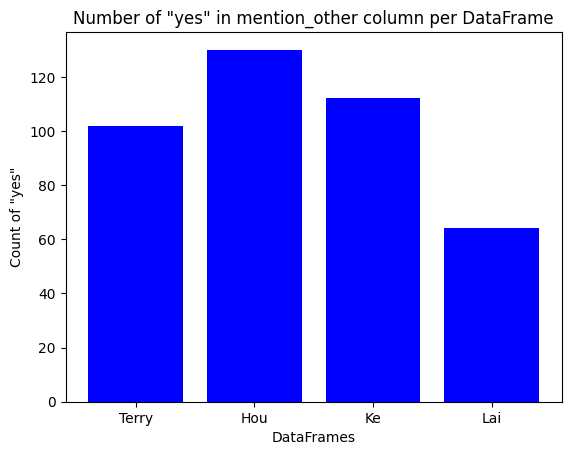

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming terry_df, hou_df, ke_df, and lai_df are your DataFrames

# Function to count 'yes' in the mention_other column
def count_yes(df):
    return df['mention_other'].value_counts().get('yes', 0)

# List of DataFrames
dfs = [terry_df, hou_df, ke_df, lai_df]

# Count 'yes' for each DataFrame
yes_counts = [count_yes(df) for df in dfs]

# Plotting
plt.bar(['Terry', 'Hou', 'Ke', 'Lai'], yes_counts, color='blue')
plt.title('Number of "yes" in mention_other column per DataFrame')
plt.xlabel('DataFrames')
plt.ylabel('Count of "yes"')
plt.show()

In [64]:
#in all four dfs, drop the rows where mention_other is 'no'
terry_df = terry_df[terry_df['mention_other'] != 'no']
hou_df = hou_df[hou_df['mention_other'] != 'no']
ke_df = ke_df[ke_df['mention_other'] != 'no']
lai_df = lai_df[lai_df['mention_other'] != 'no']

#print the number of rows per df 
print(len(terry_df))
print(len(hou_df))
print(len(ke_df))
print(len(lai_df))

102
130
112
64


In [65]:
#now merge the 4 dfs into one df called save_for_label_df
save_for_label_df = pd.concat([terry_df, hou_df, ke_df, lai_df])

## save csv 

In [ ]:
# we will have to save both labelling_df and filtered_df to seperate csv's so they can be merged back togehter after labelling!